This notebook's plot is generated from the labelling fixed (1987 consumption) dta file. The result was from the other python file

In [21]:
import pandas as pd
import numpy as np

In [22]:
def extract_mean_median(province, raw):
    #print(province)
    L = raw.split()
    results = []
    years = [str(y) for y in range(1986,2003)]
    year, mean_marker, median_marker = 0, -5, -5
    for i,item in enumerate(L):
        if i == median_marker + 1:
            median = float(item)
            median_marker = -5
        if i == mean_marker + 1:
            mean = float(item)
            mean_marker = -5
            results.append([year,province,mean,median])
        
        if item in years:
            year = int(item)
        if item == '50%':
            median_marker = i
        if item == 'Mean':
            mean_marker = i
    return results
        

In [23]:
raw0 = '''.

by YEAR, sort : summarize RealConPC [fweight = Size], detail

------------------------------------------------------------------------------------
-> YEAR = 1986

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     100.6667              0
 5%        149.8              0
10%          183              0       Obs              32,832
25%        251.5              0       Sum of Wgt.      32,832

50%          354                      Mean           471.6618
                        Largest       Std. Dev.      505.4991
75%     511.3333       7368.667
90%     785.3333       10163.25       Variance       255529.4
95%         1144        11037.5       Skewness       7.288774
99%      2516.75       11349.33       Kurtosis       95.30059

------------------------------------------------------------------------------------
-> YEAR = 1987

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     101.0651              0
 5%     153.6654              0
10%     194.0828              0       Obs              31,454
25%     272.3488       41.84615       Sum of Wgt.      31,454

50%     372.6504                      Mean           497.3024
                        Largest       Std. Dev.      545.2649
75%     536.5199       7998.738
90%     812.9389       8699.848       Variance       297313.8
95%      1159.46       8821.144       Skewness        7.15928
99%     2645.207       9004.857       Kurtosis       79.44652

------------------------------------------------------------------------------------
-> YEAR = 1988

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     107.5483       23.87492
 5%     163.2482       25.15078
10%      199.329       39.13367       Obs              26,548
25%     269.5786       48.95737       Sum of Wgt.      26,548

50%     374.3545                      Mean           494.2813
                        Largest       Std. Dev.      511.7022
75%     546.9091       6277.065
90%     822.4911       8380.058       Variance       261839.1
95%     1156.964       9874.733       Skewness       8.120637
99%     2397.122       11874.82       Kurtosis       121.6125

------------------------------------------------------------------------------------
-> YEAR = 1989

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     103.4554       41.03947
 5%     151.4624       68.52273
10%     183.6066        75.9856       Obs              26,873
25%      254.513       76.21175       Sum of Wgt.      26,873

50%     353.2426                      Mean           469.0513
                        Largest       Std. Dev.      528.3961
75%     513.7751       9342.837
90%     769.2499       11008.07       Variance       279202.4
95%     1111.775       11739.09       Skewness       9.621231
99%     2478.688       14435.67       Kurtosis       168.6402

------------------------------------------------------------------------------------
-> YEAR = 1990

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     109.7375              0
 5%     156.5065       64.22937
10%      187.429       64.27256       Obs              25,474
25%     256.7685        72.9444       Sum of Wgt.      25,474

50%     363.1505                      Mean            475.432
                        Largest       Std. Dev.      514.7314
75%     518.3373       7079.502
90%     805.1054        8379.09       Variance       264948.4
95%     1103.654       8743.221       Skewness       9.468998
99%     2435.123       17218.88       Kurtosis       186.8799

------------------------------------------------------------------------------------
-> YEAR = 1991

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     105.1028              0
 5%     145.7141              0
10%     184.8273              0       Obs              25,350
25%     260.7167              0       Sum of Wgt.      25,350

50%     367.3236                      Mean           506.8643
                        Largest       Std. Dev.      708.8349
75%     544.2693       10707.75
90%     860.1235       13619.66       Variance       502446.9
95%     1210.249       13871.45       Skewness       29.48289
99%     2718.392       60696.96       Kurtosis       2120.447

------------------------------------------------------------------------------------
-> YEAR = 1993

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     106.3598       61.17464
 5%     161.8023       72.66429
10%     193.0161       75.64539       Obs              19,509
25%     263.8164       76.21636       Sum of Wgt.      19,509

50%     392.1099                      Mean           603.3341
                        Largest       Std. Dev.      791.2217
75%     625.9837       9508.425
90%     1058.955       9641.164       Variance       626031.7
95%     1661.605       11392.63       Skewness       5.689737
99%     4388.833       12715.55       Kurtosis       49.30442

------------------------------------------------------------------------------------
-> YEAR = 1995

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     100.7261              0
 5%     171.8133              0
10%     212.6908              0       Obs              19,426
25%     305.0246              0       Sum of Wgt.      19,426

50%     460.0111                      Mean           613.2551
                        Largest       Std. Dev.      787.1366
75%     681.8631       11913.42
90%     1048.245       12957.64       Variance       619584.1
95%     1384.011       13843.39       Skewness       13.59026
99%     3281.007       27538.55       Kurtosis       345.2843

------------------------------------------------------------------------------------
-> YEAR = 1996

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     113.0611              0
 5%     172.1807              0
10%     218.7367       78.17433       Obs              19,742
25%     309.9406       80.61832       Sum of Wgt.      19,742

50%     458.6904                      Mean           624.6171
                        Largest       Std. Dev.      772.6493
75%      698.201       10213.15
90%     1047.486       11172.97       Variance         596987
95%     1462.951       11547.75       Skewness       9.543448
99%     3410.185       20330.07       Kurtosis       159.8819

------------------------------------------------------------------------------------
-> YEAR = 1997

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     111.6388       33.88781
 5%     162.4257       48.41116
10%     208.1981       53.04179       Obs              19,191
25%     302.5879       58.09338       Sum of Wgt.      19,191

50%     460.3547                      Mean           602.5237
                        Largest       Std. Dev.      674.8736
75%     688.1188       10044.18
90%     1036.444       11817.57       Variance       455454.4
95%     1429.219       13102.35       Skewness       8.506676
99%     3009.164       13138.59       Kurtosis       117.3656

------------------------------------------------------------------------------------
-> YEAR = 1998

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     120.4577       89.14711
 5%     170.8768        90.2986
10%     212.2267       91.08186       Obs              19,394
25%     304.8712       93.54812       Sum of Wgt.      19,394

50%     463.2141                      Mean           630.0598
                        Largest       Std. Dev.      920.3962
75%     714.4523       15234.62
90%     1087.537       23955.55       Variance       847129.2
95%     1438.902       29342.08       Skewness        17.5833
99%      3105.58       30320.95       Kurtosis       471.0672

------------------------------------------------------------------------------------
-> YEAR = 1999

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     105.9197              0
 5%     154.5353              0
10%     196.7038       60.56015       Obs              19,459
25%     292.5639       77.08552       Sum of Wgt.      19,459

50%     459.1428                      Mean           622.5654
                        Largest       Std. Dev.      890.7922
75%     701.0465       9749.049
90%     1069.189       10008.17       Variance       793510.8
95%     1428.781       11146.54       Skewness       23.27613
99%     3675.681       45895.91       Kurtosis        1053.35

------------------------------------------------------------------------------------
-> YEAR = 2000

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     92.24039              0
 5%     153.4337              0
10%     192.6486              0       Obs              19,091
25%     290.9569              0       Sum of Wgt.      19,091

50%     449.1878                      Mean            635.897
                        Largest       Std. Dev.      846.6966
75%     721.7758       11756.84
90%     1138.148       12290.18       Variance       716895.1
95%     1527.524       21795.05       Skewness       10.31915
99%     3404.687        26944.6       Kurtosis       186.3656

------------------------------------------------------------------------------------
-> YEAR = 2001

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     100.7893              0
 5%     156.4619              0
10%     196.7103        42.2355       Obs              18,408
25%     286.2745        46.0351       Sum of Wgt.      18,408

50%     441.4312                      Mean           633.5864
                        Largest       Std. Dev.      904.5141
75%     725.0767       20520.42
90%     1117.921       22683.77       Variance       818145.8
95%     1508.099       27053.71       Skewness       13.11199
99%     3495.212       30376.77       Kurtosis       297.3145

------------------------------------------------------------------------------------
-> YEAR = 2002

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     103.9093              0
 5%     152.8832              0
10%     198.2624              0       Obs              18,819
25%     301.0724              0       Sum of Wgt.      18,819

50%     473.9651                      Mean           739.7148
                        Largest       Std. Dev.      1177.238
75%     761.1661       15485.42
90%     1255.516       19664.97       Variance        1385889
95%     1915.467       22086.01       Skewness       9.295776
99%     5519.441       28068.29       Kurtosis       145.4294


. '''

In [24]:
raw21 = '''.

by YEAR, sort : summarize RealConPC [fweight = Size] if ProvinceCode==21, detail

------------------------------------------------------------------------------------
-> YEAR = 1986

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%       101.25              0
 5%      154.875              0
10%        186.4              0       Obs              10,566
25%     262.6667              0       Sum of Wgt.      10,566

50%       386.25                      Mean           539.2722
                        Largest       Std. Dev.      653.9954
75%     566.6667       7368.667
90%     895.6667       10163.25       Variance       427709.9
95%         1432        11037.5       Skewness       7.037797
99%         3190       11349.33       Kurtosis       82.81747

------------------------------------------------------------------------------------
-> YEAR = 1987

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     91.83432              0
 5%     154.6351              0
10%     199.6055              0       Obs               9,014
25%     291.5976       41.84615       Sum of Wgt.       9,014

50%     406.7219                      Mean            570.904
                        Largest       Std. Dev.      682.1696
75%     602.5089       7322.604
90%     944.6627       7884.497       Variance       465355.4
95%     1461.144       7998.738       Skewness       5.955792
99%     3583.432       8821.144       Kurtosis       50.82876

------------------------------------------------------------------------------------
-> YEAR = 1988

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     137.9237       92.72064
 5%     183.0926       99.25602
10%     223.0197       119.6791       Obs               5,101
25%     297.5638       121.1768       Sum of Wgt.       5,101

50%     399.4748                      Mean           567.8781
                        Largest       Std. Dev.      593.3351
75%     595.7404       5545.879
90%     1033.406       5824.654       Variance       352046.5
95%     1547.659       5879.115       Skewness       4.978144
99%      3007.09       6277.065       Kurtosis       37.16816

------------------------------------------------------------------------------------
-> YEAR = 1989

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     115.0212       41.03947
 5%     174.7662        102.117
10%      205.594        113.054       Obs               5,033
25%     268.3829       115.0212       Sum of Wgt.       5,033

50%      362.317                      Mean           542.9892
                        Largest       Std. Dev.      706.0497
75%     550.9897       6813.843
90%     946.4238       8377.049       Variance       498506.2
95%      1411.73       8915.288       Skewness       7.608929
99%     3338.919       11739.09       Kurtosis       89.77441

------------------------------------------------------------------------------------
-> YEAR = 1990

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     121.2789       75.63594
 5%     173.5978       85.88098
10%     209.1015       98.42474       Obs               4,867
25%     279.8911       107.0012       Sum of Wgt.       4,867

50%     379.8678                      Mean           529.1578
                        Largest       Std. Dev.       613.871
75%     535.1692       6307.678
90%     921.1902       7079.502       Variance       376837.6
95%     1269.802        8379.09       Skewness       6.897581
99%      3337.13       8743.221       Kurtosis       71.31044

------------------------------------------------------------------------------------
-> YEAR = 1991

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      125.028              0
 5%     178.8488              0
10%     214.4681              0       Obs               4,805
25%     290.8488              0       Sum of Wgt.       4,805

50%     389.4289                      Mean           564.5064
                        Largest       Std. Dev.      817.8501
75%     546.9877       7006.584
90%     955.0728       8666.518       Variance       668878.8
95%     1379.149       13619.66       Skewness       10.05959
99%     3349.183       13871.45       Kurtosis       142.4178

------------------------------------------------------------------------------------
-> YEAR = 1993

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     152.9748       135.8461
 5%     212.7282       136.6617
10%     253.3399       139.6086       Obs               2,383
25%     333.8727        149.628       Sum of Wgt.       2,383

50%     451.5639                      Mean           641.5508
                        Largest       Std. Dev.      685.6097
75%     716.2769        5080.06
90%     1123.499       6052.199       Variance       470060.7
95%     1565.555       6670.713       Skewness       5.415056
99%     4448.505       7363.526       Kurtosis       41.69617

------------------------------------------------------------------------------------
-> YEAR = 1995

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     34.62213              0
 5%     200.4785              0
10%     243.7438              0       Obs               4,509
25%      337.931              0       Sum of Wgt.       4,509

50%      529.064                      Mean           616.8017
                        Largest       Std. Dev.      503.2225
75%     738.7192       3692.611
90%     1057.471       3776.473       Variance       253232.9
95%     1286.601        4864.04       Skewness       8.461777
99%     2630.345       12957.64       Kurtosis       170.8575

------------------------------------------------------------------------------------
-> YEAR = 1996

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     155.0656       96.68534
 5%     210.6412       120.3031
10%     264.1626       125.4695       Obs               4,455
25%     357.7726       135.9868       Sum of Wgt.       4,455

50%     494.4975                      Mean            661.031
                        Largest       Std. Dev.      663.5969
75%     709.1489       6103.539
90%     1103.025       6367.578       Variance       440360.9
95%     1608.962       6374.959       Skewness       5.026694
99%      3935.93       8050.346       Kurtosis       37.10643

------------------------------------------------------------------------------------
-> YEAR = 1997

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     129.6848       86.37625
 5%     199.7375       99.50736
10%     250.0936       100.4195       Obs               4,422
25%     359.5999       104.3261       Sum of Wgt.       4,422

50%     498.2898                      Mean           633.1821
                        Largest       Std. Dev.      619.6071
75%     712.6944       5670.354
90%     1021.697       6144.279       Variance         383913
95%     1452.133       6257.279       Skewness        8.34085
99%     3009.164       13138.59       Kurtosis       130.6444

------------------------------------------------------------------------------------
-> YEAR = 1998

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     115.2403       98.03204
 5%          192       98.92906
10%     246.5904       104.4699       Obs               4,350
25%     376.3844       105.0191       Sum of Wgt.       4,350

50%      543.524                      Mean           676.2607
                        Largest       Std. Dev.      548.0681
75%     770.5263        4035.79
90%     1202.746       4840.274       Variance       300378.6
95%     1547.521        5587.46       Skewness       3.703136
99%     3119.085       6475.667       Kurtosis       25.35973

------------------------------------------------------------------------------------
-> YEAR = 1999

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     137.7049       87.51913
 5%     198.5889       96.20984
10%     247.5016       110.0415       Obs               4,307
25%     356.7475        126.101       Sum of Wgt.       4,307

50%     534.2033                      Mean           711.0323
                        Largest       Std. Dev.      751.0622
75%     784.7344       6407.256
90%     1227.226        7060.59       Variance       564094.4
95%     1649.276       7229.875       Skewness       5.380778
99%     4421.736       9749.049       Kurtosis       44.11251

------------------------------------------------------------------------------------
-> YEAR = 2000

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     87.59399              0
 5%     153.4337              0
10%     204.4064              0       Obs               4,261
25%     330.8254              0       Sum of Wgt.       4,261

50%     490.0599                      Mean           655.7223
                        Largest       Std. Dev.      610.4663
75%     762.8412       4269.824
90%     1277.909       4705.492       Variance       372669.1
95%     1629.175       4822.764       Skewness        4.38639
99%     3313.594       9207.497       Kurtosis       39.35036

------------------------------------------------------------------------------------
-> YEAR = 2001

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     133.9197              0
 5%     193.1972       111.8652
10%     243.7755       118.7266       Obs               4,194
25%      333.574       119.9212       Sum of Wgt.       4,194

50%     484.7391                      Mean           669.1003
                        Largest       Std. Dev.      897.6118
75%     740.5405       7042.915
90%     1137.919       9349.997       Variance         805707
95%     1599.317          11658       Skewness       13.08484
99%     3440.499       22683.77       Kurtosis       277.8257

------------------------------------------------------------------------------------
-> YEAR = 2002

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     127.1593       80.07981
 5%     213.1737       96.37512
10%     257.1866       96.93382       Obs               4,209
25%     371.5331       106.9593       Sum of Wgt.       4,209

50%     544.1703                      Mean           913.0145
                        Largest       Std. Dev.       1388.03
75%     874.0495       12142.09
90%      1638.75       13181.76       Variance        1926627
95%     2731.405       13261.96       Skewness       6.118278
99%     7823.053       22086.01       Kurtosis       55.93517


. '''

In [25]:
raw42 = '''.


by YEAR, sort : summarize RealConPC [fweight = Size] if ProvinceCode==42, detail

------------------------------------------------------------------------------------
-> YEAR = 1986

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%       117.25           44.8
 5%        164.8           57.4
10%          204           73.5       Obs               7,698
25%      262.875          74.75       Sum of Wgt.       7,698

50%          348                      Mean           411.5233
                        Largest       Std. Dev.      315.9216
75%     460.6667        2676.75
90%     642.1667           3088       Variance       99806.47
95%       858.25         4732.8       Skewness       7.300963
99%       1604.4         5752.5       Kurtosis       96.65296

------------------------------------------------------------------------------------
-> YEAR = 1987

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     127.2825        54.9812
 5%     176.5038       66.96429
10%      216.792       78.00752       Obs               7,922
25%     278.2999       87.27175       Sum of Wgt.       7,922

50%     361.9276                      Mean           444.9341
                        Largest       Std. Dev.      339.3192
75%     489.0977       3165.414
90%     705.8271       3285.088       Variance       115137.5
95%     975.2954       4401.081       Skewness       4.585115
99%       2040.1       4430.639       Kurtosis       36.20481

------------------------------------------------------------------------------------
-> YEAR = 1988

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     116.5074       39.13367
 5%     166.5701         59.743
10%     196.4703       68.56412       Obs               7,937
25%     258.0844       76.98427       Sum of Wgt.       7,937

50%     348.1667                      Mean           435.2734
                        Largest       Std. Dev.      349.8432
75%     483.2367       3107.759
90%     704.8872       3939.028       Variance       122390.2
95%     1014.314       4181.609       Skewness       4.481801
99%     1928.296       5155.941       Kurtosis       34.44617

------------------------------------------------------------------------------------
-> YEAR = 1989

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     102.1735       68.52273
 5%      148.579        75.9856
10%     174.5294       76.21175       Obs               7,950
25%      247.462       77.88524       Sum of Wgt.       7,950

50%     337.3416                      Mean           398.6886
                        Largest       Std. Dev.      312.6639
75%     458.6274       3689.372
90%     629.2557       3717.358       Variance       97758.73
95%     831.0925       4433.624       Skewness       7.211112
99%     1649.464       9342.837       Kurtosis       119.9946

------------------------------------------------------------------------------------
-> YEAR = 1990

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     108.9317       64.22937
 5%     147.5016       76.01013
10%     180.1004       79.88326       Obs               6,850
25%     254.2063       82.62672       Sum of Wgt.       6,850

50%     346.6449                      Mean            416.691
                        Largest       Std. Dev.      336.9111
75%     463.6995       3076.554
90%     653.7517       3131.262       Variance       113509.1
95%     963.6019       4648.883       Skewness       5.765826
99%      1668.35        5925.67       Kurtosis       61.83919

------------------------------------------------------------------------------------
-> YEAR = 1991

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      115.064       77.57471
 5%     147.9216       78.92474
10%     185.4731       90.34806       Obs               7,508
25%     249.4437       91.38654       Sum of Wgt.       7,508

50%     343.4116                      Mean           425.3351
                        Largest       Std. Dev.      374.9944
75%     472.7177       4042.193
90%     682.6575       4911.352       Variance       140620.8
95%     979.4976       5016.498       Skewness       6.844384
99%      1903.54       6989.513       Kurtosis       83.18005

------------------------------------------------------------------------------------
-> YEAR = 1993

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      121.309       76.21636
 5%     160.1524        84.5977
10%     187.0691       106.3598       Obs               4,098
25%     241.3926       107.5035       Sum of Wgt.       4,098

50%     325.7453                      Mean           392.5338
                        Largest       Std. Dev.      278.7679
75%     456.7263       2947.686
90%     644.0405       2995.965       Variance       77711.57
95%     826.6656       3048.654       Skewness       5.313709
99%     1427.182       4259.906       Kurtosis       55.14087

------------------------------------------------------------------------------------
-> YEAR = 1995

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     113.2486       60.47829
 5%     185.1242       62.25706
10%      215.288       65.88049       Obs               3,927
25%     280.6509        67.1981       Sum of Wgt.       3,927

50%     395.8594                      Mean           496.5263
                        Largest       Std. Dev.       404.677
75%     557.5137        3065.09
90%     785.2955       3092.035       Variance       163763.5
95%     1238.553       3380.328       Skewness        3.58128
99%     2483.777       3442.667       Kurtosis       19.56047

------------------------------------------------------------------------------------
-> YEAR = 1996

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     129.5935       83.90974
 5%     178.5917       103.7969
10%     211.4098       104.6691       Obs               3,833
25%     280.9639       104.6691       Sum of Wgt.       3,833

50%     374.1921                      Mean            459.039
                        Largest       Std. Dev.       342.256
75%     524.2505        2839.15
90%     741.9442       2869.312       Variance       117139.2
95%     929.5927       3781.717       Skewness       4.070565
99%     2024.344       3802.629       Kurtosis       27.35987

------------------------------------------------------------------------------------
-> YEAR = 1997

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     97.24328       33.88781
 5%     152.4657       48.41116
10%     188.8877       53.04179       Obs               3,759
25%       262.38       58.09338       Sum of Wgt.       3,759

50%     367.3438                      Mean            467.562
                        Largest       Std. Dev.      487.6242
75%     510.5272       3916.841
90%      762.623       4457.965       Variance       237777.3
95%     1051.259       5331.289       Skewness       8.992228
99%     1990.393       9944.353       Kurtosis       137.6279

------------------------------------------------------------------------------------
-> YEAR = 1998

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     116.2335       89.14711
 5%     169.1786       91.08186
10%     199.1299       93.54812       Obs               3,760
25%     258.7598       101.6982       Sum of Wgt.       3,760

50%     355.6955                      Mean           430.8553
                        Largest       Std. Dev.      405.9922
75%     478.2293       4183.217
90%     661.5553       4409.954       Variance       164829.7
95%     878.1958       4449.914       Skewness       7.894187
99%     1998.145       6764.167       Kurtosis        94.2941

------------------------------------------------------------------------------------
-> YEAR = 1999

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     115.5185       60.56015
 5%     148.3724       90.84022
10%     181.6805       99.75121       Obs               3,733
25%     248.2966       105.9197       Sum of Wgt.       3,733

50%     358.6372                      Mean           431.0083
                        Largest       Std. Dev.       394.954
75%      487.055       3712.337
90%     688.8044       4464.267       Variance       155988.7
95%     871.5615       5021.496       Skewness       6.825432
99%     1761.291       5691.543       Kurtosis        70.4371

------------------------------------------------------------------------------------
-> YEAR = 2000

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     109.4646       61.67021
 5%     157.6702       65.98713
10%     189.6359       74.00426       Obs               3,677
25%      248.531       77.70446       Sum of Wgt.       3,677

50%     348.2825                      Mean            444.087
                        Largest       Std. Dev.      465.4712
75%     485.3446        3501.84
90%     719.4858       4237.283       Variance       216663.4
95%     940.4707       6812.502       Skewness       8.817516
99%     2179.014       8106.935       Kurtosis       119.4749

------------------------------------------------------------------------------------
-> YEAR = 2001

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     113.1599       82.80369
 5%     150.0706       85.99637
10%     179.9744       98.87007       Obs               3,668
25%     236.5158       102.9253       Sum of Wgt.       3,668

50%     337.1367                      Mean           438.6851
                        Largest       Std. Dev.      428.9607
75%     480.7558       4038.225
90%     723.9144       4049.039       Variance       184007.3
95%     1019.598       4107.228       Skewness        5.52763
99%     2294.095       5809.647       Kurtosis       46.85268

------------------------------------------------------------------------------------
-> YEAR = 2002

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     76.62921              0
 5%     142.5303       21.45618
10%     174.7146       67.21477       Obs               3,636
25%     235.2517       70.32372       Sum of Wgt.       3,636

50%     345.6284                      Mean           465.8088
                        Largest       Std. Dev.      478.8848
75%     519.2702       4015.371
90%     804.6068       4343.114       Variance       229330.6
95%     1115.951       4864.422       Skewness       5.036866
99%     2817.911       5486.039       Kurtosis       38.23411


. '''

In [26]:
raw44 = '''.


by YEAR, sort : summarize RealConPC [fweight = Size] if ProvinceCode==44, detail

------------------------------------------------------------------------------------
-> YEAR = 1986

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      176.125          117.5
 5%        223.4        129.375
10%        250.8          148.8       Obs               5,819
25%          330            154       Sum of Wgt.       5,819

50%        455.5                      Mean           613.0256
                        Largest       Std. Dev.      570.5054
75%     659.9167           5219
90%         1107           5580       Variance       325476.4
95%     1537.429           5822       Skewness       4.533567
99%         3210         6677.5       Kurtosis       32.36871

------------------------------------------------------------------------------------
-> YEAR = 1987

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     191.0367       152.6977
 5%     249.4822       160.4465
10%     288.0744       162.2698       Obs               5,838
25%     364.6512       165.2326       Sum of Wgt.       5,838

50%     493.9884                      Mean           662.0609
                        Largest       Std. Dev.       735.025
75%     686.4558       7492.214
90%     1018.569       7889.836       Variance       540261.8
95%     1588.238       8699.848       Skewness        6.49406
99%     4203.907       9004.857       Kurtosis       59.18434

------------------------------------------------------------------------------------
-> YEAR = 1988

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     180.2878        117.882
 5%      254.518       141.2892
10%      300.446       150.8777       Obs               5,138
25%     401.6061       151.5827       Sum of Wgt.       5,138

50%     559.0935                      Mean           719.1489
                        Largest       Std. Dev.       779.422
75%     762.3201       5550.647
90%     1130.408       8380.058       Variance       607498.7
95%     1692.086       9874.733       Skewness       7.842755
99%     4064.532       11874.82       Kurtosis       90.99045

------------------------------------------------------------------------------------
-> YEAR = 1989

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      99.2324        99.2324
 5%      214.342       145.7756
10%     271.8456        146.928       Obs               5,301
25%      358.245       154.1303       Sum of Wgt.       5,301

50%     504.1646                      Mean           665.5578
                        Largest       Std. Dev.      760.2465
75%     684.7996       5867.439
90%     1147.882       6990.314       Variance       577974.7
95%     1747.332       11008.07       Skewness       8.429459
99%     3410.746       14435.67       Kurtosis       118.1219

------------------------------------------------------------------------------------
-> YEAR = 1990

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     161.3655       155.4618
 5%     243.6881       156.0768
10%     288.4337       158.3645       Obs               5,262
25%     386.3325       159.0696       Sum of Wgt.       5,262

50%     528.3735                      Mean           686.2429
                        Largest       Std. Dev.      745.2424
75%     723.1927       5885.608
90%     1099.548        6566.59       Variance       555386.2
95%     1600.617       6872.791       Skewness       9.194025
99%      3947.55       17218.88       Kurtosis       156.3129

------------------------------------------------------------------------------------
-> YEAR = 1991

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     204.0764       107.5538
 5%     266.5206       147.7387
10%     317.9337       166.8856       Obs               5,228
25%     410.7726       175.5136       Sum of Wgt.       5,228

50%     558.4523                      Mean           787.5311
                        Largest       Std. Dev.      1153.373
75%     814.2618       5905.175
90%     1305.616       9130.251       Variance        1330269
95%     2171.337       10707.75       Skewness       28.54355
99%     4624.221       60696.96       Kurtosis       1403.062

------------------------------------------------------------------------------------
-> YEAR = 1993

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     229.2111       169.9001
 5%     296.6601       172.4445
10%     362.2376        174.642       Obs               5,105
25%     468.4107       191.9906       Sum of Wgt.       5,105

50%     650.9174                      Mean           954.2216
                        Largest       Std. Dev.      962.5131
75%     1011.998       7799.135
90%     1832.585       7963.676       Variance       926431.5
95%     2699.764       8817.455       Skewness       4.027333
99%     5149.974       9641.164       Kurtosis       25.84812

------------------------------------------------------------------------------------
-> YEAR = 1995

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     159.6936              0
 5%     276.1471              0
10%      335.766              0       Obs               4,538
25%     481.5376              0       Sum of Wgt.       4,538

50%     659.9576                      Mean           954.7669
                        Largest       Std. Dev.      1373.544
75%     968.3164       9401.448
90%     1457.323       11913.42       Variance        1886623
95%     2433.485       13843.39       Skewness       9.610099
99%       7272.2       27538.55       Kurtosis       146.0673

------------------------------------------------------------------------------------
-> YEAR = 1996

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     209.5178              0
 5%     272.8517              0
10%     347.1619       149.9608       Obs               5,037
25%     484.4886       155.9592       Sum of Wgt.       5,037

50%     675.5156                      Mean           898.5237
                        Largest       Std. Dev.      1117.213
75%     960.3641       10074.29
90%     1454.491       10213.15       Variance        1248164
95%     2014.418       11547.75       Skewness       8.827074
99%     6156.481       20330.07       Kurtosis       117.2652

------------------------------------------------------------------------------------
-> YEAR = 1997

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     212.8678         136.27
 5%     328.6026       141.7099
10%     388.2376       147.7197       Obs               4,685
25%     504.8982       168.8802       Sum of Wgt.       4,685

50%     666.6323                      Mean           877.4725
                        Largest       Std. Dev.      934.0307
75%     954.7993       9885.854
90%     1416.594       10044.18       Variance       872413.3
95%     1781.726       11817.57       Skewness       7.322847
99%     4727.029       13102.35       Kurtosis       75.84448

------------------------------------------------------------------------------------
-> YEAR = 1998

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     234.2527       160.1891
 5%     320.0252       173.6044
10%      362.963       174.9173       Obs               5,413
25%     497.7226       187.0727       Sum of Wgt.       5,413

50%     674.5448                      Mean           904.9398
                        Largest       Std. Dev.      1346.693
75%     961.3112       9348.227
90%     1379.774       15234.62       Variance        1813581
95%     1827.686       23955.55       Skewness       12.95336
99%     4514.023       29342.08       Kurtosis       224.2009

------------------------------------------------------------------------------------
-> YEAR = 1999

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     186.8095              0
 5%     277.5656              0
10%     342.5652       149.8368       Obs               5,632
25%     464.5184       151.7827       Sum of Wgt.       5,632

50%     638.7072                      Mean           847.0343
                        Largest       Std. Dev.      895.0274
75%     913.5071       8221.671
90%     1317.558        8338.09       Variance         801074
95%     1935.682       10008.17       Skewness       6.090325
99%     4886.825       11146.54       Kurtosis       53.82602

------------------------------------------------------------------------------------
-> YEAR = 2000

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%       197.95       135.7288
 5%     275.1062       147.5665
10%     341.0594       171.9414       Obs               5,430
25%     477.4832        188.825       Sum of Wgt.       5,430

50%     687.7655                      Mean           958.3852
                        Largest       Std. Dev.       1308.92
75%     1005.719       11756.84
90%     1508.973       12290.18       Variance        1713271
95%     2249.637       21795.05       Skewness       8.240752
99%     7936.972        26944.6       Kurtosis       102.2519

------------------------------------------------------------------------------------
-> YEAR = 2001

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     177.0032              0
 5%     280.0832       74.08207
10%     346.0691       132.3708       Obs               4,894
25%     506.4039       133.3477       Sum of Wgt.       4,894

50%     721.6652                      Mean           901.8526
                        Largest       Std. Dev.      934.9696
75%     1020.867       8070.924
90%     1460.475       9282.483       Variance       874168.2
95%     1943.067       12339.96       Skewness       9.309386
99%     4740.194       27053.71       Kurtosis       169.1915

------------------------------------------------------------------------------------
-> YEAR = 2002

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     186.1812       124.7468
 5%     287.1929       142.1845
10%     353.3151        143.629       Obs               4,696
25%      490.939       154.6489       Sum of Wgt.       4,696

50%     720.3121                      Mean           1017.355
                        Largest       Std. Dev.      1438.348
75%     1055.116       10505.56
90%     1744.845       10963.23       Variance        2068846
95%     2496.315       13810.68       Skewness       10.72234
99%      5303.75       28068.29       Kurtosis       174.1585


. '''

In [27]:
raw62 = '''.

by YEAR, sort : summarize RealConPC [fweight = Size] if ProvinceCode==62, detail

------------------------------------------------------------------------------------
-> YEAR = 1986

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     67.33334           43.2
 5%     92.71429           46.3
10%          114       67.33334       Obs               1,609
25%          150       78.33334       Sum of Wgt.       1,609

50%     210.2857                      Mean            248.371
                        Largest       Std. Dev.       135.007
75%          316          720.4
90%        424.6            753       Variance       18226.89
95%      503.625         848.25       Skewness       1.420201
99%        720.4          880.6       Kurtosis       5.716421

------------------------------------------------------------------------------------
-> YEAR = 1987

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     77.25557       65.90597
 5%     118.5577        68.3794
10%     133.7296       77.25557       Obs               1,609
25%     163.2464       92.04919       Sum of Wgt.       1,609

50%     251.3507                      Mean           277.5241
                        Largest       Std. Dev.      166.7094
75%     337.9833       707.7456
90%     429.4064       760.8148       Variance       27792.03
95%     539.8497       1061.759       Skewness       4.513333
99%     760.8148       2054.388       Kurtosis       43.13547

------------------------------------------------------------------------------------
-> YEAR = 1988

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     88.26906       66.94411
 5%     121.1241       68.67171
10%     131.8367       88.26906       Obs               1,300
25%     185.7497       90.96841       Sum of Wgt.       1,300

50%     245.3595                      Mean           276.8129
                        Largest       Std. Dev.      141.1109
75%     328.4277       659.5074
90%     442.8492       768.1837       Variance       19912.27
95%     530.2621       911.6816       Skewness       2.226887
99%     768.1837       1245.484       Kurtosis       12.50689

------------------------------------------------------------------------------------
-> YEAR = 1989

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     101.2023       87.50209
 5%     119.8765       101.2023
10%     136.6083       103.4554       Obs               1,675
25%     169.9326       108.3621       Sum of Wgt.       1,675

50%     222.7999                      Mean           265.4604
                        Largest       Std. Dev.      163.2764
75%     307.2785       902.7883
90%     429.0425       1094.637       Variance       26659.19
95%     528.5007       1133.018       Skewness       3.965631
99%     860.1044       1742.239       Kurtosis       29.52685

------------------------------------------------------------------------------------
-> YEAR = 1990

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     98.10638       89.77557
 5%     121.9557       96.02368
10%     142.3913       97.20753       Obs               1,665
25%     180.6034       98.10638       Sum of Wgt.       1,665

50%     240.6073                      Mean           273.0242
                        Largest       Std. Dev.      142.6599
75%     325.4282       879.1757
90%     427.6906       932.8328       Variance       20351.86
95%     530.2678       1004.302       Skewness       2.181898
99%      826.856       1119.531       Kurtosis       10.23494

------------------------------------------------------------------------------------
-> YEAR = 1991

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     97.95297              0
 5%     129.3105       91.87024
10%     143.1989       92.91898       Obs               1,638
25%     180.5942       97.95297       Sum of Wgt.       1,638

50%     240.6874                      Mean           274.9638
                        Largest       Std. Dev.      150.3034
75%     319.5682       883.4645
90%     423.1694       994.6841       Variance       22591.12
95%      524.793        1180.47       Skewness       2.850745
99%     883.4645       1392.684       Kurtosis        16.1524

------------------------------------------------------------------------------------
-> YEAR = 1993

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%       115.97       100.0886
 5%     144.5157       101.9853
10%     164.2185       113.5571       Obs               1,622
25%     192.9145         115.97       Sum of Wgt.       1,622

50%     255.9238                      Mean           304.4376
                        Largest       Std. Dev.      194.0078
75%     344.3864       1073.399
90%     484.2296       1265.023       Variance       37639.03
95%     585.0417       1463.881       Skewness       3.432019
99%     1265.023       1627.169       Kurtosis        19.1114

------------------------------------------------------------------------------------
-> YEAR = 1995

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     116.2609        97.0496
 5%     154.8309       98.16267
10%     171.8133       116.2609       Obs               1,577
25%     214.0362        118.247       Sum of Wgt.       1,577

50%     306.9036                      Mean           365.2764
                        Largest       Std. Dev.      245.8558
75%     417.1299       1392.266
90%      636.265       1444.401       Variance       60445.07
95%     813.9792       1985.621       Skewness       3.157021
99%     1320.052       2410.485       Kurtosis       19.28165

------------------------------------------------------------------------------------
-> YEAR = 1996

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      87.7131       78.17433
 5%     130.8189        87.7131
10%     153.1809       88.00657       Obs               1,607
25%     186.5752       104.3406       Sum of Wgt.       1,607

50%      249.634                      Mean           323.5572
                        Largest       Std. Dev.      245.7925
75%     399.2891       1298.661
90%      550.041       1320.647       Variance       60413.96
95%     721.0605       1535.414       Skewness       4.610766
99%     1320.647       2829.624       Kurtosis       39.06844

------------------------------------------------------------------------------------
-> YEAR = 1997

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     110.6895       106.5351
 5%     130.8785        107.614
10%     155.1988       110.6895       Obs               1,551
25%     183.6197        112.745       Sum of Wgt.       1,551

50%     246.4707                      Mean            306.017
                        Largest       Std. Dev.      280.8391
75%     368.6859       1020.871
90%     524.4683       1152.495       Variance       78870.59
95%     669.9227       1280.694       Skewness       14.71031
99%      935.608       6570.268       Kurtosis       320.6467

------------------------------------------------------------------------------------
-> YEAR = 1998

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     111.9474        90.2986
 5%     141.5506       94.30112
10%     150.6333       111.9474       Obs               1,527
25%     181.7408        113.434       Sum of Wgt.       1,527

50%      239.792                      Mean           296.2342
                        Largest       Std. Dev.      183.1704
75%     343.7241       1117.627
90%     498.8987       1242.526       Variance       33551.38
95%     669.0365       1255.354       Skewness       2.563958
99%     1070.564       1393.031       Kurtosis       11.18573

------------------------------------------------------------------------------------
-> YEAR = 1999

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     104.5248       88.28329
 5%     129.0882       104.5248
10%     143.5344       112.0637       Obs               1,520
25%     176.2289       116.6497       Sum of Wgt.       1,520

50%     245.0809                      Mean             299.25
                        Largest       Std. Dev.       206.098
75%     339.1309       1252.652
90%     498.0113       1474.036       Variance       42476.38
95%     673.7802        1503.59       Skewness        3.17197
99%     1249.751       1841.414       Kurtosis       16.97799

------------------------------------------------------------------------------------
-> YEAR = 2000

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     89.12048       55.36747
 5%     135.6385       58.81325
10%     152.4759       68.44579       Obs               1,483
25%     185.7068       89.12048       Sum of Wgt.       1,483

50%     251.0499                      Mean           307.7004
                        Largest       Std. Dev.      203.9653
75%     353.7253       942.8916
90%          520       1087.771       Variance       41601.84
95%     649.8747       1111.578       Skewness       3.844567
99%     1087.771       2214.072       Kurtosis       29.45883

------------------------------------------------------------------------------------
-> YEAR = 2001

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     97.63446       88.81965
 5%     133.5016       89.06705
10%     150.8202       97.63446       Obs               1,465
25%     178.8269       104.7528       Sum of Wgt.       1,465

50%     252.1191                      Mean            299.972
                        Largest       Std. Dev.      188.6807
75%     339.8403        1004.38
90%     517.1403       1008.338       Variance       35600.39
95%     689.3295       1057.226       Skewness       2.796997
99%     1008.338       1652.194       Kurtosis       15.26473

------------------------------------------------------------------------------------
-> YEAR = 2002

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     72.20775              0
 5%     136.9548              0
10%     154.6048              0       Obs               2,118
25%     201.7933              0       Sum of Wgt.       2,118

50%       303.71                      Mean           381.7819
                        Largest       Std. Dev.      293.8307
75%     472.0428       2066.189
90%     693.4622       2452.886       Variance       86336.47
95%     851.6925       2658.603       Skewness       3.627757
99%     1463.281       3361.456       Kurtosis       25.48302


. '''



In [28]:
data = []
data.extend(extract_mean_median(21,raw21))
data.extend(extract_mean_median(42,raw42))
data.extend(extract_mean_median(44,raw44))
data.extend(extract_mean_median(62,raw62))
data.extend(extract_mean_median(0 ,raw0))
df2 = pd.DataFrame.from_records(data)
df2=df2.rename(columns={0:'Year', 1:'ProvinceCode',2:'mean_rural',3:'median_rural'})
df2

,Year,ProvinceCode,mean_rural,median_rural
0,1986,21,539.2722,386.2500
1,1987,21,570.9040,406.7219
2,1988,21,567.8781,399.4748
3,1989,21,542.9892,362.3170
4,1990,21,529.1578,379.8678
...,...,...,...,...
70,1998,0,630.0598,463.2141
71,1999,0,622.5654,459.1428
72,2000,0,635.8970,449.1878
73,2001,0,633.5864,441.4312


In [29]:
raw0 = '''.

 by YEAR, sort : summarize  RealConPC  [fweight = Size], detail

------------------------------------------------------------------------------------
-> YEAR = 1986

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      287.556              0
 5%     407.0697              0
10%      478.305              0       Obs              22,060
25%       603.74         174.22       Sum of Wgt.      22,060

50%     778.4333                      Mean           859.6528
                        Largest       Std. Dev.      393.3639
75%     1016.105         3768.4
90%      1341.57       4218.567       Variance       154735.1
95%     1574.588        4383.36       Skewness       2.526143
99%      2247.13        7962.94       Kurtosis       23.38725

------------------------------------------------------------------------------------
-> YEAR = 1987

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     292.1659        188.172
 5%     402.1122       190.7834
10%      474.471        194.384       Obs              20,497
25%     599.3856       197.0936       Sum of Wgt.      20,497

50%     768.3087                      Mean           860.5253
                        Largest       Std. Dev.      453.4585
75%     1002.725       5583.934
90%      1334.87       8326.371       Variance       205624.6
95%     1587.622       11076.12       Skewness       5.772157
99%     2393.389       15449.84       Kurtosis       106.9798

------------------------------------------------------------------------------------
-> YEAR = 1988

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     273.8188              0
 5%     388.5536       162.2905
10%     457.2199       187.5283       Obs              21,081
25%     595.7637       191.5483       Sum of Wgt.      21,081

50%     782.3505                      Mean            889.452
                        Largest       Std. Dev.      446.6189
75%     1072.576       4300.034
90%     1453.777       4466.515       Variance       199468.4
95%     1724.955       4555.282       Skewness       1.961949
99%     2407.324       4876.917       Kurtosis        10.2085

------------------------------------------------------------------------------------
-> YEAR = 1989

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     211.4265              0
 5%     363.2489       68.23569
10%     432.5891         87.603       Obs              18,412
25%      563.939       102.6785       Sum of Wgt.      18,412

50%     741.2205                      Mean            840.751
                        Largest       Std. Dev.      432.8841
75%     1009.628       4141.793
90%      1357.34       5810.431       Variance       187388.6
95%     1629.469       6309.181       Skewness       2.391561
99%     2408.114       7008.389       Kurtosis       17.33656

------------------------------------------------------------------------------------
-> YEAR = 1990

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     288.6465       166.4021
 5%     392.9553       166.4021
10%     461.6853       177.5634       Obs              19,005
25%     592.1668       177.6755       Sum of Wgt.      19,005

50%     779.5687                      Mean           872.8138
                        Largest       Std. Dev.      434.9905
75%     1043.359       4547.005
90%      1384.72        4568.62       Variance       189216.7
95%     1640.213       5035.962       Skewness        2.60683
99%     2447.395        8438.29       Kurtosis       20.79783

------------------------------------------------------------------------------------
-> YEAR = 1991

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     275.8511       36.81813
 5%     403.2571       80.78445
10%     479.1808       136.7027       Obs              20,067
25%     621.7256       138.0842       Sum of Wgt.      20,067

50%     827.8738                      Mean            922.246
                        Largest       Std. Dev.      466.4747
75%     1100.597        4752.96
90%      1464.35       4753.749       Variance       217598.6
95%     1758.566       4980.038       Skewness       2.379268
99%     2540.704       5571.486       Kurtosis       14.53726

------------------------------------------------------------------------------------
-> YEAR = 1992

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     333.1901       70.49644
 5%     453.8986       97.38062
10%     534.8555       129.6963       Obs              24,878
25%     690.2928       140.7342       Sum of Wgt.      24,878

50%     891.4936                      Mean           1014.408
                        Largest       Std. Dev.      555.7547
75%     1181.284        7182.14
90%     1588.408       7609.388       Variance       308863.3
95%      1963.16       7936.841       Skewness       3.619973
99%     3053.105       8496.631       Kurtosis       29.99488

------------------------------------------------------------------------------------
-> YEAR = 1993

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     311.8395       145.4617
 5%     432.6523       175.4097
10%     517.6553       176.8358       Obs              19,760
25%     702.1144       193.2636       Sum of Wgt.      19,760

50%     967.3372                      Mean           1117.893
                        Largest       Std. Dev.      687.0514
75%     1321.296       9567.313
90%     1835.413       9825.382       Variance       472039.7
95%     2321.345       10301.37       Skewness       3.673093
99%     3568.876       11711.03       Kurtosis       33.65079

------------------------------------------------------------------------------------
-> YEAR = 1994

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     317.6413       74.39107
 5%     428.9236       112.1394
10%      516.556       153.9228       Obs              20,180
25%     715.8738        166.279       Sum of Wgt.      20,180

50%     1000.546                      Mean           1204.312
                        Largest       Std. Dev.      871.6604
75%     1428.972        14144.3
90%     2035.593       14210.85       Variance       759791.9
95%      2573.97        18866.7       Skewness        5.91335
99%     4323.606       22554.19       Kurtosis       87.67623

------------------------------------------------------------------------------------
-> YEAR = 1995

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     336.4975              0
 5%     469.5715       135.5641
10%     574.6107        147.038       Obs              20,005
25%     766.8536       185.6446       Sum of Wgt.      20,005

50%     1059.577                      Mean           1254.811
                        Largest       Std. Dev.      833.0221
75%     1486.481       9575.459
90%     2111.657       12973.79       Variance       693925.9
95%     2692.861       14650.84       Skewness       4.090127
99%     4196.229       16131.15       Kurtosis       40.85182

------------------------------------------------------------------------------------
-> YEAR = 1996

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     348.5235        115.153
 5%     476.8016       265.5988
10%     576.6181       267.1817       Obs              19,934
25%     768.2702       268.3719       Sum of Wgt.      19,934

50%     1061.984                      Mean            1275.89
                        Largest       Std. Dev.      870.8702
75%     1504.414       8595.769
90%     2193.712       10243.19       Variance       758414.9
95%     2794.161       14846.29       Skewness       4.748533
99%     4564.538       20051.66       Kurtosis       63.56646

------------------------------------------------------------------------------------
-> YEAR = 1997

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     331.4674       197.9085
 5%     477.3826       201.0959
10%     573.7141       205.2943       Obs              19,976
25%     771.6401         215.62       Sum of Wgt.      19,976

50%     1086.903                      Mean           1322.661
                        Largest       Std. Dev.      903.0057
75%     1580.723       9410.878
90%      2315.36          10248       Variance       815419.2
95%     2926.064       12125.91       Skewness       3.156464
99%     4891.608       13535.91       Kurtosis       21.56321




. '''


In [30]:
raw21 = '''.


by YEAR, sort : summarize  RealConPC  [fweight = Size] if ProvinceCode==21, detail

------------------------------------------------------------------------------------
-> YEAR = 1986

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     278.8434              0
 5%     438.3033              0
10%       506.94       219.9357       Obs               3,348
25%     610.6846        245.632       Sum of Wgt.       3,348

50%       751.36                      Mean           808.1049
                        Largest       Std. Dev.      319.4017
75%      918.668       2670.975
90%     1167.477       2759.373       Variance       102017.5
95%     1383.315        2824.12       Skewness       2.034469
99%     2123.817        3041.35       Kurtosis       10.63771

------------------------------------------------------------------------------------
-> YEAR = 1987

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     314.9839       271.0793
 5%     423.9258        282.114
10%     497.1154        294.398       Obs               2,640
25%     623.9333       310.7635       Sum of Wgt.       2,640

50%     781.5392                      Mean           858.0459
                        Largest       Std. Dev.      383.2725
75%     974.6467       2791.862
90%     1280.249       3115.226       Variance       146897.8
95%     1595.567       3366.175       Skewness       2.194792
99%     2363.746       3760.588       Kurtosis       11.05959

------------------------------------------------------------------------------------
-> YEAR = 1988

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     392.2113       216.5412
 5%     474.1568       299.5529
10%     544.7167       319.3539       Obs               2,360
25%      674.451       354.3229       Sum of Wgt.       2,360

50%     830.2694                      Mean           951.4364
                        Largest       Std. Dev.      431.8116
75%     1123.895        3301.81
90%     1515.916        3301.81       Variance       186461.3
95%     1787.417       3864.995       Skewness       1.910365
99%     2452.272       3872.991       Kurtosis       9.102476

------------------------------------------------------------------------------------
-> YEAR = 1989

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     137.9336       68.23569
 5%     198.6958       102.6785
10%     429.9932       108.6897       Obs               2,377
25%     604.6982       110.3144       Sum of Wgt.       2,377

50%     790.2343                      Mean           848.8856
                        Largest       Std. Dev.      388.7682
75%     1056.029       2187.008
90%     1382.423       2309.183       Variance       151140.7
95%     1567.905       2328.029       Skewness       .7977793
99%     2036.456       3033.889       Kurtosis       4.408333

------------------------------------------------------------------------------------
-> YEAR = 1990

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     339.1533       183.9182
 5%      461.135       291.0331
10%     529.6591       297.7573       Obs               2,338
25%      647.165       301.3295       Sum of Wgt.       2,338

50%     837.7969                      Mean           901.1367
                        Largest       Std. Dev.      364.8954
75%     1071.044       2433.961
90%     1354.722       2786.353       Variance       133148.7
95%     1546.363       2809.677       Skewness       1.613792
99%     2195.829       3477.477       Kurtosis       8.255514

------------------------------------------------------------------------------------
-> YEAR = 1991

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     335.2481       275.8511
 5%     469.5655       282.5125
10%     541.6309       294.2888       Obs               2,480
25%     698.9458       294.2888       Sum of Wgt.       2,480

50%     872.3192                      Mean           933.3622
                        Largest       Std. Dev.        366.97
75%     1111.017       2721.041
90%     1361.561       2882.222       Variance         134667
95%      1566.16       2914.636       Skewness       1.822162
99%     2116.762       4051.526       Kurtosis       11.44022

------------------------------------------------------------------------------------
-> YEAR = 1992

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     379.6194       97.38062
 5%     515.5121       281.6886
10%     589.2353       332.8547       Obs               3,231
25%      737.782       347.7094       Sum of Wgt.       3,231

50%       922.09                      Mean           984.3763
                        Largest       Std. Dev.      376.3314
75%     1153.713       2810.834
90%     1418.896       2824.038       Variance       141625.3
95%     1681.329       3017.699       Skewness       1.484132
99%      2418.01       3033.104       Kurtosis        6.82975

------------------------------------------------------------------------------------
-> YEAR = 1993

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     361.9921       227.6591
 5%     488.7836       249.8123
10%     571.5045       328.0553       Obs               3,200
25%      761.456       341.7243       Sum of Wgt.       3,200

50%     961.0701                      Mean           1036.778
                        Largest       Std. Dev.      435.5814
75%     1247.176       3174.972
90%     1545.537       3262.171       Variance       189731.1
95%      1758.82       3428.084       Skewness       1.818054
99%     2877.554       4638.966       Kurtosis       10.01302

------------------------------------------------------------------------------------
-> YEAR = 1994

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     381.3009       74.39107
 5%     492.3268       254.2006
10%     590.2688       301.3025       Obs               3,153
25%     761.8542       326.7226       Sum of Wgt.       3,153

50%     1010.448                      Mean           1097.644
                        Largest       Std. Dev.      512.8661
75%     1288.573       3655.629
90%     1708.378       3829.084       Variance       263031.6
95%     1977.905       4114.686       Skewness       1.975208
99%     3205.545       4612.994       Kurtosis       9.885184

------------------------------------------------------------------------------------
-> YEAR = 1995

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     336.4975        222.185
 5%     466.9104       233.7772
10%     575.4269        270.808       Obs               3,226
25%     779.2574       278.8582       Sum of Wgt.       3,226

50%     1044.591                      Mean            1112.36
                        Largest       Std. Dev.       518.424
75%     1328.602       3697.931
90%       1713.4       3743.334       Variance       268763.5
95%     1956.194       3948.452       Skewness       2.041414
99%     3047.798       6283.327       Kurtosis       12.97172

------------------------------------------------------------------------------------
-> YEAR = 1996

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     338.7018       303.2839
 5%     492.8735       308.6412
10%     583.6504       311.3199       Obs               3,177
25%     769.0732       313.1057       Sum of Wgt.       3,177

50%     1016.403                      Mean           1123.252
                        Largest       Std. Dev.       558.956
75%     1319.984       4041.503
90%     1767.916       4046.861       Variance       312431.8
95%      2181.62       4463.839       Skewness       2.123952
99%     3275.406       5471.611       Kurtosis       11.11347

------------------------------------------------------------------------------------
-> YEAR = 1997

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     350.3671       226.7924
 5%     506.6273       291.5903
10%     594.3624       292.1637       Obs               3,173
25%     750.6227       305.3526       Sum of Wgt.       3,173

50%     1023.003                      Mean           1156.531
                        Largest       Std. Dev.      674.2448
75%     1365.342       6084.402
90%      1795.99       6548.596       Variance       454606.1
95%     2109.083       6642.065       Skewness       3.834682
99%     4094.593        7830.79       Kurtosis       28.74961


.'''

In [31]:
raw42 = '''.


. by YEAR, sort : summarize  RealConPC  [fweight = Size] if ProvinceCode==42, detail

------------------------------------------------------------------------------------
-> YEAR = 1986

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      315.925         241.42
 5%      425.444        286.735
10%      478.465        289.785       Obs               2,592
25%     562.7357         291.14       Sum of Wgt.       2,592

50%     696.3975                      Mean           783.1001
                        Largest       Std. Dev.       347.761
75%       890.93       2301.912
90%     1216.027        2598.34       Variance       120937.7
95%     1454.227       2744.665       Skewness        2.25808
99%      2110.96       3272.944       Kurtosis       11.34657

------------------------------------------------------------------------------------
-> YEAR = 1987

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     357.7124       248.3901
 5%     455.0138       258.8163
10%     510.1196       293.9283       Obs               2,553
25%     600.9659       318.3073       Sum of Wgt.       2,553

50%     740.3864                      Mean           810.1878
                        Largest       Std. Dev.      307.8283
75%     948.4821       2051.058
90%     1205.612       2084.177       Variance       94758.26
95%     1395.354        2291.26       Skewness       1.631318
99%     1807.421       3356.486       Kurtosis       8.486313

------------------------------------------------------------------------------------
-> YEAR = 1988

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     291.8943       199.3708
 5%     404.2494       206.3873
10%     449.4841       259.3202       Obs               2,332
25%     568.2014       291.8943       Sum of Wgt.       2,332

50%     715.8662                      Mean           794.3677
                        Largest       Std. Dev.      340.3021
75%     950.5014       2051.403
90%     1274.054       2067.818       Variance       115805.5
95%     1455.909       2091.103       Skewness       1.709161
99%     1865.629        3545.23       Kurtosis       9.228109

------------------------------------------------------------------------------------
-> YEAR = 1989

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     335.2243       256.6707
 5%      411.001       264.5216
10%     467.3736       308.7275       Obs               2,230
25%     569.4129       309.6643       Sum of Wgt.       2,230

50%      697.213                      Mean           792.3392
                        Largest       Std. Dev.      379.2191
75%      897.277       2711.403
90%     1209.752       2850.633       Variance       143807.1
95%     1455.315       2850.633       Skewness        2.92295
99%      2143.83       4141.793       Kurtosis       18.20487

------------------------------------------------------------------------------------
-> YEAR = 1990

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     322.5489       218.8724
 5%     419.0863       235.7138
10%     476.7493       254.8683       Obs               2,217
25%     595.1253       311.6782       Sum of Wgt.       2,217

50%     759.1904                      Mean           820.3105
                        Largest       Std. Dev.      336.2225
75%     966.1863       2414.898
90%     1241.737       2522.468       Variance       113045.5
95%     1445.737       2637.718       Skewness       1.587121
99%      1933.13       2797.479       Kurtosis       7.382569

------------------------------------------------------------------------------------
-> YEAR = 1991

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      304.085       244.5635
 5%     406.6892       255.5939
10%      485.216       288.0333       Obs               2,242
25%     615.0754       296.8434       Sum of Wgt.       2,242

50%     785.6496                      Mean           836.6426
                        Largest       Std. Dev.      347.5696
75%     972.8764       2102.806
90%     1254.289       2601.059       Variance       120804.6
95%     1470.009       2678.873       Skewness       2.585367
99%     1839.625       4559.034       Kurtosis       21.86902

------------------------------------------------------------------------------------
-> YEAR = 1992

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     343.4345       235.0397
 5%     457.3596       291.4492
10%     524.8298       316.8888       Obs               2,471
25%     669.1719       324.0783       Sum of Wgt.       2,471

50%     847.8021                      Mean           925.9681
                        Largest       Std. Dev.      389.6502
75%     1087.266       2703.233
90%     1421.299       2791.719       Variance       151827.3
95%     1651.361       3281.707       Skewness       1.839386
99%     2240.896        4140.57       Kurtosis       9.963716

------------------------------------------------------------------------------------
-> YEAR = 1993

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     330.9828       222.5173
 5%     453.4139       279.3104
10%      522.776       293.7415       Obs               2,389
25%     675.0001        296.069       Sum of Wgt.       2,389

50%     946.3967                      Mean           1022.636
                        Largest       Std. Dev.      528.1097
75%     1238.742       3331.242
90%         1539       3551.897       Variance       278899.9
95%     1942.138       3584.484       Skewness       4.577105
99%      2609.69       9567.313       Kurtosis       61.64332

------------------------------------------------------------------------------------
-> YEAR = 1994

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     330.6273       286.2748
 5%     447.1899       303.8692
10%     554.2222       304.9688       Obs               2,365
25%     725.7672       315.2322       Sum of Wgt.       2,365

50%     958.8924                      Mean           1058.284
                        Largest       Std. Dev.      487.6459
75%     1300.516       3102.105
90%     1667.432       3108.336       Variance       237798.5
95%      1963.97       3472.686       Skewness        1.63486
99%     2715.029       5256.681       Kurtosis       9.219316

------------------------------------------------------------------------------------
-> YEAR = 1995

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      429.421       338.1652
 5%     560.6583       370.2115
10%     612.8481       394.0174       Obs               2,366
25%     793.8336       404.6995       Sum of Wgt.       2,366

50%     1004.119                      Mean           1121.473
                        Largest       Std. Dev.      495.6556
75%     1346.251       3847.087
90%     1711.885       3891.036       Variance       245674.5
95%     1945.671       4000.604       Skewness       1.867645
99%     2879.898       4237.137       Kurtosis       9.238029

------------------------------------------------------------------------------------
-> YEAR = 1996

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     400.1984       265.5988
 5%     539.5063        336.776
10%     614.2838       355.3319       Obs               2,381
25%     769.1011       366.1331       Sum of Wgt.       2,381

50%     1003.127                      Mean            1117.02
                        Largest       Std. Dev.      518.3259
75%     1360.952       4075.377
90%      1709.36       4183.389       Variance       268661.8
95%     2051.121       4203.884       Skewness       2.107377
99%     2957.314       4484.715       Kurtosis        11.1154

------------------------------------------------------------------------------------
-> YEAR = 1997

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     386.5478       372.2412
 5%     535.5522       374.4007
10%      607.895       375.7504       Obs               2,351
25%     777.1446       381.1491       Sum of Wgt.       2,351

50%     986.8846                      Mean           1104.162
                        Largest       Std. Dev.      498.2462
75%      1300.82        3523.74
90%     1685.478       3536.966       Variance       248249.3
95%     2070.406       3584.745       Skewness       1.757828
99%     2875.894       4202.897       Kurtosis       7.715517


. '''

In [32]:
raw44 = '''.


------------------------------------------------------------------------------------
-> YEAR = 1986

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     336.6233              0
 5%      513.005        200.305
10%     624.6957       303.1717       Obs               2,570
25%     800.8967         333.61       Sum of Wgt.       2,570

50%       1059.8                      Mean           1160.435
                        Largest       Std. Dev.      528.0496
75%     1404.198       3483.265
90%     1776.243         3768.4       Variance       278836.4
95%     2161.073       4218.567       Skewness       1.614435
99%     2967.626        4383.36       Kurtosis       8.066407

------------------------------------------------------------------------------------
-> YEAR = 1987

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     389.5923       355.2869
 5%     501.1956       357.5916
10%     591.0811       367.3679       Obs               2,310
25%     764.2923        388.041       Sum of Wgt.       2,310

50%     1007.222                      Mean             1161.5
                        Largest       Std. Dev.      785.9644
75%     1348.282       5583.934
90%      1793.72       8326.371       Variance       617740.1
95%     2229.998       11076.12       Skewness       6.843485
99%     3419.016       15449.84       Kurtosis       87.88307

------------------------------------------------------------------------------------
-> YEAR = 1988

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     447.0394       353.9974
 5%     512.8771       418.9796
10%     595.2996       435.5417       Obs               2,151
25%     805.2913        442.933       Sum of Wgt.       2,151

50%      1078.36                      Mean           1183.495
                        Largest       Std. Dev.      570.4474
75%     1431.046       3920.149
90%     1875.211        4232.57       Variance       325410.2
95%     2211.585       4466.515       Skewness       1.850666
99%     3455.225       4876.917       Kurtosis       9.068855

------------------------------------------------------------------------------------
-> YEAR = 1989

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     356.9052       255.9748
 5%     479.0546       306.2155
10%     543.5255       307.6189       Obs               2,413
25%     739.7167       330.3535       Sum of Wgt.       2,413

50%     1037.746                      Mean           1169.377
                        Largest       Std. Dev.      613.0593
75%      1444.77        3459.59
90%     1963.596       3551.931       Variance       375841.7
95%     2372.258       4011.395       Skewness       1.821929
99%     3123.716       6309.181       Kurtosis       10.17367

------------------------------------------------------------------------------------
-> YEAR = 1990

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     487.1503       410.0893
 5%     596.3154       441.3575
10%     683.0019       447.2653       Obs               2,005
25%     864.8475       467.8226       Sum of Wgt.       2,005

50%     1139.297                      Mean           1304.581
                        Largest       Std. Dev.      636.3792
75%     1576.572       4116.455
90%     2088.919       4547.005       Variance       404978.5
95%     2596.971        4568.62       Skewness       1.767447
99%     3624.232       5035.962       Kurtosis       7.663205

------------------------------------------------------------------------------------
-> YEAR = 1991

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     475.2623       222.5327
 5%     625.6268       222.5327
10%     739.5692       442.3612       Obs               2,132
25%     1004.214       475.2623       Sum of Wgt.       2,132

50%     1369.984                      Mean           1494.826
                        Largest       Std. Dev.      724.5835
75%     1802.233        4752.96
90%     2348.706       4753.749       Variance       525021.3
95%     2762.222       4980.038       Skewness       1.765539
99%     4620.887       5571.486       Kurtosis       8.378685

------------------------------------------------------------------------------------
-> YEAR = 1992

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      595.653       427.7682
 5%     754.1819       514.0495
10%     937.1398       518.2076       Obs               2,135
25%     1162.719       565.5065       Sum of Wgt.       2,135

50%     1559.821                      Mean           1813.068
                        Largest       Std. Dev.      1050.787
75%     2083.226        7182.14
90%     2841.046       7609.388       Variance        1104153
95%     3801.056       7936.841       Skewness        2.64245
99%     6731.502       8496.631       Kurtosis       13.07946

------------------------------------------------------------------------------------
-> YEAR = 1993

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     527.1283       435.5094
 5%     751.7011       454.6854
10%     927.2685       514.3442       Obs               2,083
25%     1218.318       527.1283       Sum of Wgt.       2,083

50%      1742.89                      Mean           1979.593
                        Largest       Std. Dev.      1184.919
75%     2371.438       8548.683
90%     3310.638       9825.382       Variance        1404034
95%     3805.807       10301.37       Skewness       2.979352
99%     6352.812       11711.03       Kurtosis       18.87151

------------------------------------------------------------------------------------
-> YEAR = 1994

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     594.0409       388.0457
 5%     809.8957       521.5024
10%     972.2269       541.9258       Obs               2,065
25%     1370.132       579.6036       Sum of Wgt.       2,065

50%     2008.189                      Mean           2361.753
                        Largest       Std. Dev.       1756.02
75%      2876.89        14144.3
90%     4006.167       14210.85       Variance        3083606
95%     5149.176        18866.7       Skewness       4.412395
99%     8203.187       22554.19       Kurtosis       36.72494

------------------------------------------------------------------------------------
-> YEAR = 1995

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     636.9526        444.248
 5%      846.157       505.8886
10%     1125.407       621.0755       Obs               2,067
25%     1541.637       623.8774       Sum of Wgt.       2,067

50%     2093.289                      Mean           2439.677
                        Largest       Std. Dev.      1511.447
75%     2965.908       9575.459
90%     3921.337       12973.79       Variance        2284471
95%     4956.774       14650.84       Skewness       3.121301
99%     8106.047       16131.15       Kurtosis       20.67733

------------------------------------------------------------------------------------
-> YEAR = 1996

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     694.0502       516.6173
 5%     958.8928       609.5445
10%     1222.283       649.6194       Obs               2,080
25%     1603.575       675.4648       Sum of Wgt.       2,080

50%     2233.448                      Mean           2544.054
                        Largest       Std. Dev.      1586.871
75%     3057.451       8595.769
90%     4328.376       10243.19       Variance        2518159
95%     5151.072       14846.29       Skewness       4.042164
99%      7522.75       20051.66       Kurtosis       36.53629

------------------------------------------------------------------------------------
-> YEAR = 1997

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     710.8292         625.78
 5%     1109.337       697.4603
10%     1278.298       708.2692       Obs               2,090
25%     1643.526       708.8381       Sum of Wgt.       2,090

50%     2216.399                      Mean           2584.788
                        Largest       Std. Dev.      1452.839
75%     3087.656       9410.878
90%     4232.975          10248       Variance        2110742
95%     5217.583       12125.91       Skewness       2.330828
99%     8414.466       13535.91       Kurtosis        11.9275


. '''

In [33]:
raw62 = '''.


by YEAR, sort : summarize  RealConPC  [fweight = Size] if ProvinceCode==62, detail

------------------------------------------------------------------------------------
-> YEAR = 1986

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     338.7575         254.64
 5%     408.5975         288.27
10%     449.9333       338.7575       Obs                 744
25%     572.9075        347.964       Sum of Wgt.         744

50%       712.12                      Mean           759.3973
                        Largest       Std. Dev.      284.4801
75%        879.8       1630.073
90%     1063.018       1662.733       Variance       80928.93
95%     1218.903        2001.22       Skewness       2.005726
99%     1662.733       2669.927       Kurtosis       11.82843

------------------------------------------------------------------------------------
-> YEAR = 1987

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     301.1106        194.384
 5%     363.7779       273.7369
10%     469.0435       301.1106       Obs               1,120
25%     562.3909       310.2147       Sum of Wgt.       1,120

50%     682.1893                      Mean           763.6839
                        Largest       Std. Dev.      340.4655
75%     867.2308       2110.696
90%     1129.549        2276.63       Variance       115916.7
95%     1350.153       2608.036       Skewness       2.945467
99%      1989.36       3913.207       Kurtosis       20.02378
-> YEAR = 1988

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     239.9583       191.5483
 5%     297.4993        221.135
10%     384.4229       239.9583       Obs               1,154
25%     503.7389       242.3685       Sum of Wgt.       1,154

50%     670.6741                      Mean           771.4078
                        Largest       Std. Dev.      410.1045
75%     948.3044       2371.271
90%     1265.214       2736.769       Variance       168185.7
95%     1484.053       2838.409       Skewness       2.267574
99%     1962.669        3868.46       Kurtosis       13.24376

------------------------------------------------------------------------------------
-> YEAR = 1989

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     227.9836         87.603
 5%     310.3865        216.332
10%     358.6113       227.9836       Obs               1,111
25%     472.7542       234.8451       Sum of Wgt.       1,111

50%     620.9888                      Mean           656.5524
                        Largest       Std. Dev.      274.1787
75%     796.3243       1618.929
90%     1016.281       1620.224       Variance       75173.98
95%     1187.172       1637.702       Skewness       1.213245
99%     1508.455       2189.536       Kurtosis        5.53061

------------------------------------------------------------------------------------
-> YEAR = 1990

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     198.5816       166.4021
 5%      329.311       166.4021
10%     380.0149       177.6755       Obs               1,077
25%     477.8238       198.5816       Sum of Wgt.       1,077

50%     634.3602                      Mean            677.146
                        Largest       Std. Dev.      279.9044
75%     814.0152       1780.883
90%      1036.52       1810.099       Variance       78346.46
95%     1164.391       1903.462       Skewness        1.93706
99%     1666.561       3572.563       Kurtosis       14.96398

------------------------------------------------------------------------------------
-> YEAR = 1991

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     195.1393       136.7027
 5%     355.1265       193.1263
10%     413.4129       195.1393       Obs                 990
25%     523.6163       253.5759       Sum of Wgt.         990

50%     711.8554                      Mean           757.1929
                        Largest       Std. Dev.       318.407
75%     916.9595       1996.159
90%     1122.064       2040.225       Variance         101383
95%     1329.972       2115.286       Skewness       1.269321
99%     1884.694       2164.409       Kurtosis       5.785774

------------------------------------------------------------------------------------
-> YEAR = 1992

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      304.631       248.6326
 5%     398.7082       258.1523
10%     446.8668       301.2711       Obs               1,379
25%      572.863        304.631       Sum of Wgt.       1,379

50%      739.738                      Mean           779.7998
                        Largest       Std. Dev.      297.2161
75%      911.093       1912.343
90%     1149.646       1926.343       Variance       88337.42
95%     1319.881       2234.894       Skewness       1.379104
99%     1814.906       2416.328       Kurtosis       6.646345

------------------------------------------------------------------------------------
-> YEAR = 1993

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     243.0631       201.7423
 5%     374.8033       206.6036
10%     437.0274       231.8822       Obs               1,338
25%     559.5312       243.0631       Sum of Wgt.       1,338

50%     765.1625                      Mean           821.5324
                        Largest       Std. Dev.      386.0533
75%     950.8627       2334.378
90%     1292.609       2428.686       Variance       149037.2
95%     1446.225       3322.186       Skewness        2.38244
99%     2108.329       3938.108       Kurtosis       15.50284

------------------------------------------------------------------------------------
-> YEAR = 1994

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     264.1808       248.9621
 5%     352.3711       250.9132
10%     424.9525       250.9132       Obs               1,325
25%     559.1892       264.1808       Sum of Wgt.       1,325

50%     780.0552                      Mean           862.9677
                        Largest       Std. Dev.       422.866
75%     1045.797       2534.887
90%     1389.973       2657.027       Variance       178815.7
95%     1712.688        2785.02       Skewness       1.680562
99%     2143.103       3790.624       Kurtosis       8.236162

------------------------------------------------------------------------------------
-> YEAR = 1995

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%      275.641       194.9175
 5%     372.1153       254.9679
10%     457.1046        275.641       Obs               1,293
25%     618.8796        280.235       Sum of Wgt.       1,293

50%     779.6702                      Mean           873.4102
                        Largest       Std. Dev.      425.7433
75%     1033.325       2679.296
90%     1383.783       2793.162       Variance       181257.4
95%     1640.392       3300.144       Skewness       2.411402
99%     2587.087       4646.191       Kurtosis       15.63238

------------------------------------------------------------------------------------
-> YEAR = 1996

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     282.3557       267.1817
 5%      415.054       268.3719
10%     468.3119       282.3557       Obs               1,261
25%     619.1595       291.8767       Sum of Wgt.       1,261

50%     793.2144                      Mean           876.9802
                        Largest       Std. Dev.      408.8751
75%     1027.965       2766.729
90%     1297.825       2873.542       Variance       167178.8
95%      1576.61       3468.007       Skewness       2.220577
99%     2559.649       4026.768       Kurtosis        12.5227

------------------------------------------------------------------------------------
-> YEAR = 1997

                          RealConPC
-------------------------------------------------------------
      Percentiles      Smallest
 1%     274.3729         215.62
 5%      392.168       255.5604
10%     440.5016       274.3729       Obs               1,284
25%     554.8237       277.8459       Sum of Wgt.       1,284

50%     780.2841                      Mean           849.5943
                        Largest       Std. Dev.      399.0946
75%     1020.505       2330.144
90%     1371.864        2372.11       Variance       159276.5
95%     1674.311        2838.37       Skewness       1.543774
99%     2322.908       3186.546       Kurtosis       6.984141


. '''

In [34]:
data_urban = []
data_urban.extend(extract_mean_median(21,raw21))
data_urban.extend(extract_mean_median(42,raw42))
data_urban.extend(extract_mean_median(44,raw44))
data_urban.extend(extract_mean_median(62,raw62))
data_urban.extend(extract_mean_median(0 ,raw0))
df3 = pd.DataFrame.from_records(data_urban)
df3=df3.rename(columns={0:'Year', 1:'ProvinceCode',2:'mean_urban',3:'median_urban'})
df3

,Year,ProvinceCode,mean_urban,median_urban
0,1986,21,808.1049,751.3600
1,1987,21,858.0459,781.5392
2,1988,21,951.4364,830.2694
3,1989,21,848.8856,790.2343
4,1990,21,901.1367,837.7969
5,1991,21,933.3622,872.3192
6,1992,21,984.3763,922.0900
7,1993,21,1036.7780,961.0701
8,1994,21,1097.6440,1010.4480
9,1995,21,1112.3600,1044.5910


In [35]:
df = df2.merge(df3,how='outer')
#df=df.set_index('Year')
df=df.sort_values('Year')
df

        

,Year,ProvinceCode,mean_rural,median_rural,mean_urban,median_urban
0,1986,21,539.2722,386.2500,808.1049,751.3600
30,1986,44,613.0256,455.5000,1160.4350,1059.8000
60,1986,0,471.6618,354.0000,859.6528,778.4333
15,1986,42,411.5233,348.0000,783.1001,696.3975
45,1986,62,248.3710,210.2857,759.3973,712.1200
...,...,...,...,...,...,...
74,2002,0,739.7148,473.9651,NaN,NaN
14,2002,21,913.0145,544.1703,NaN,NaN
59,2002,62,381.7819,303.7100,NaN,NaN
29,2002,42,465.8088,345.6284,NaN,NaN


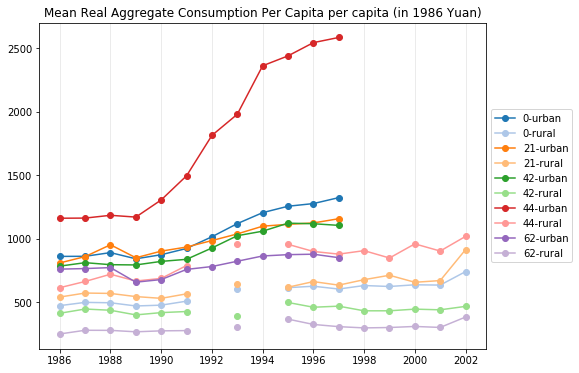

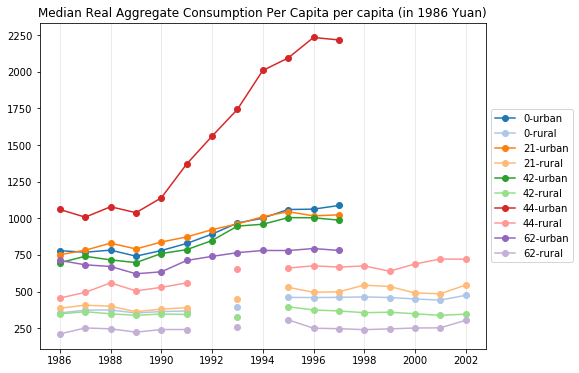

In [36]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

name = 'Real Aggregate Consumption Per Capita'
def f(name):
    # mean
    cmap = plt.get_cmap('tab20')
    cmaplist = [cmap(i) for i in range(cmap.N)]

    fig, ax = plt.subplots(1, 1, figsize=(8,6))

    for i,(key, grp) in enumerate(df.groupby(['ProvinceCode'])):
        ax.plot(grp['Year'], grp['mean_urban'], label=f'{key}-urban',marker='o',color=cmaplist[2*i])
        ax.plot(grp['Year'], grp['mean_rural'], label=f'{key}-rural',marker='o',color=cmaplist[2*i+1])

    ax.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(f'Mean {name} per capita (in 1986 Yuan)')
    ax.xaxis.grid(True, alpha=0.3)

    
    # median
    cmap = plt.get_cmap('tab20')
    cmaplist = [cmap(i) for i in range(cmap.N)]

    fig, ax = plt.subplots(1, 1, figsize=(8,6))

    for i,(key, grp) in enumerate(df.groupby(['ProvinceCode'])):
        ax.plot(grp['Year'], grp['median_urban'], label=f'{key}-urban',marker='o',color=cmaplist[2*i])
        ax.plot(grp['Year'], grp['median_rural'], label=f'{key}-rural',marker='o',color=cmaplist[2*i+1])

    ax.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(f'Median {name} per capita (in 1986 Yuan)')
    ax.xaxis.grid(True, alpha=0.3)

f(name)

In [37]:
df['mean_urban/rural']  = df['mean_urban']   / df['mean_rural']
df['median_urban/rural']= df['median_urban'] / df['median_rural']
df['mean_urban-rural']   = df['mean_urban']   - df['mean_rural']
df['median_urban-rural']= df['median_urban'] - df['median_rural']

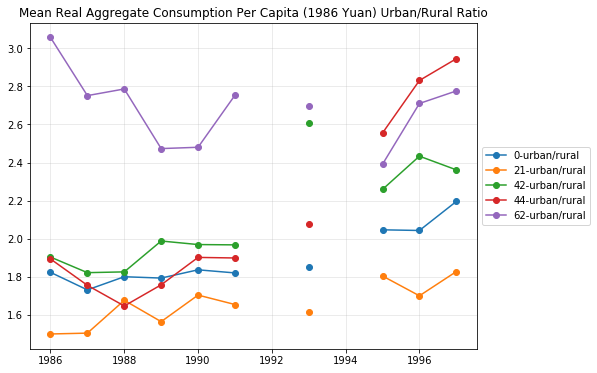

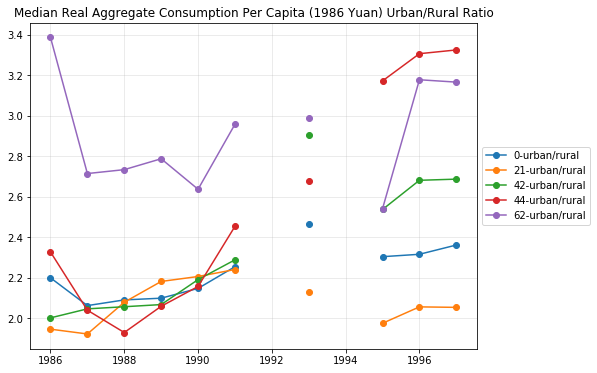

In [38]:
def g(name):
    # mean
    fig, ax = plt.subplots(1, 1, figsize=(8,6))

    for i,(key, grp) in enumerate(df.groupby(['ProvinceCode'])):
        ax.plot(grp['Year'], grp['mean_urban/rural'], label=f'{key}-urban/rural',marker='o')

    ax.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(f'Mean {name} (1986 Yuan) Urban/Rural Ratio')
    ax.xaxis.grid(True, alpha=0.3)
    ax.yaxis.grid(True, alpha=0.3)

    # median
    fig, ax = plt.subplots(1, 1, figsize=(8,6))

    for i,(key, grp) in enumerate(df.groupby(['ProvinceCode'])):
        ax.plot(grp['Year'], grp['median_urban/rural'], label=f'{key}-urban/rural',marker='o')

    ax.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(f'Median {name} (1986 Yuan) Urban/Rural Ratio')
    ax.xaxis.grid(True, alpha=0.3)
    ax.yaxis.grid(True, alpha=0.3)

g(name)

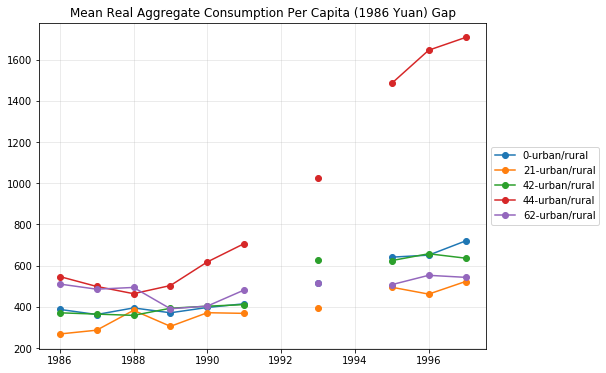

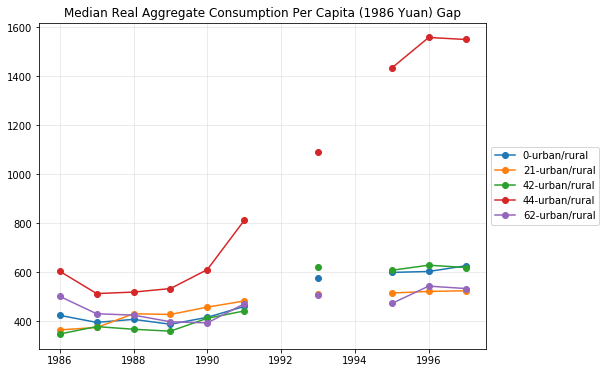

In [39]:
def h(name):
    # mean
    fig, ax = plt.subplots(1, 1, figsize=(8,6))

    for i,(key, grp) in enumerate(df.groupby(['ProvinceCode'])):
        ax.plot(grp['Year'], grp['mean_urban-rural'], label=f'{key}-urban/rural',marker='o')

    ax.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(f'Mean {name} (1986 Yuan) Gap')
    ax.xaxis.grid(True, alpha=0.3)
    ax.yaxis.grid(True, alpha=0.3)

    # median
    fig, ax = plt.subplots(1, 1, figsize=(8,6))

    for i,(key, grp) in enumerate(df.groupby(['ProvinceCode'])):
        ax.plot(grp['Year'], grp['median_urban-rural'], label=f'{key}-urban/rural',marker='o')

    ax.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(f'Median {name} (1986 Yuan) Gap')
    ax.xaxis.grid(True, alpha=0.3)
    ax.yaxis.grid(True, alpha=0.3)

h(name)